# Training Metrics Visualization
This notebook visualizes training logs including loss, accuracy, and learning rate over epochs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../models/yolo8n/yolo8n results.csv")

# Preview data
df.head()

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,1508.15,1.58908,0.94821,0.99824,0.19167,0.003333,0.003333,0.003333
1,2,3018.85,0.25687,0.98276,0.99977,0.05536,0.006534,0.006534,0.006534
2,3,4577.81,0.19278,0.98509,0.99972,0.04916,0.009603,0.009603,0.009603
3,4,6098.80,0.17719,0.98998,0.99989,0.02878,0.009406,0.009406,0.009406
4,5,7636.71,0.12768,0.99311,0.99994,0.02158,0.009208,0.009208,0.009208


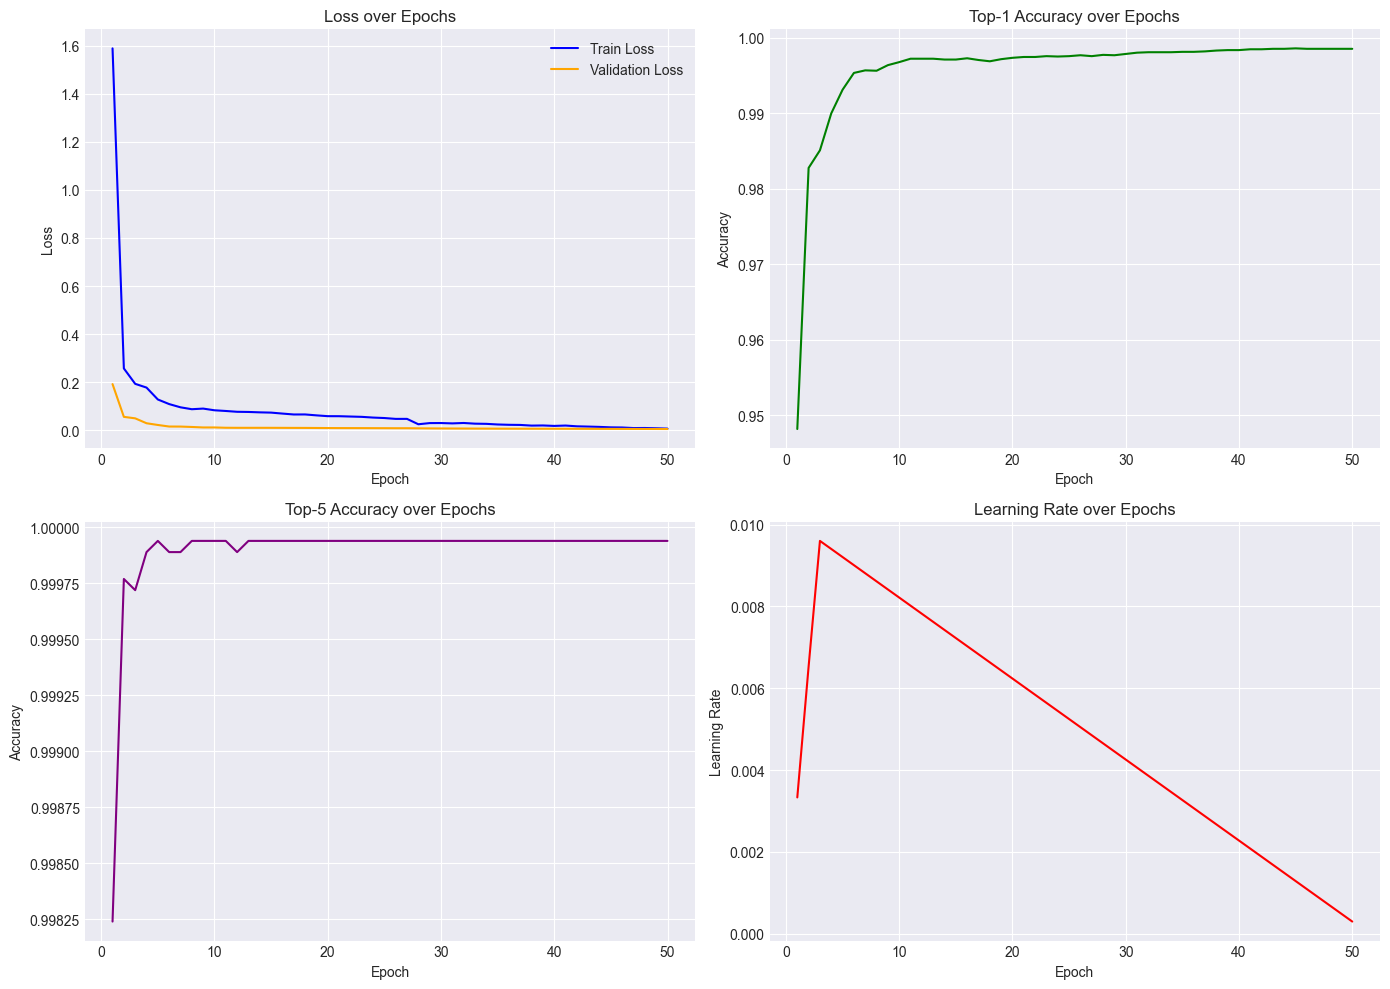

In [2]:
# Set the style
plt.style.use("seaborn-v0_8-darkgrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot train and val loss
axs[0, 0].plot(df['epoch'], df['train/loss'], label='Train Loss', color='blue')
axs[0, 0].plot(df['epoch'], df['val/loss'], label='Validation Loss', color='orange')
axs[0, 0].set_title("Loss over Epochs")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend()

# Plot accuracy top1
axs[0, 1].plot(df['epoch'], df['metrics/accuracy_top1'], label='Top-1 Accuracy', color='green')
axs[0, 1].set_title("Top-1 Accuracy over Epochs")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Accuracy")

# Plot accuracy top5
axs[1, 0].plot(df['epoch'], df['metrics/accuracy_top5'], label='Top-5 Accuracy', color='purple')
axs[1, 0].set_title("Top-5 Accuracy over Epochs")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Accuracy")

# Plot learning rate (pg0)
axs[1, 1].plot(df['epoch'], df['lr/pg0'], label='Learning Rate (pg0)', color='red')
axs[1, 1].set_title("Learning Rate over Epochs")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("Learning Rate")

# Layout adjustment
plt.tight_layout()
plt.show()

## Summary of Key Metrics

In [3]:
# Key Metrics Summary
metrics_summary = {'Final Epoch': 50, 'Final Train Loss': 0.00641, 'Final Val Loss': 0.00477, 'Final Top-1 Accuracy': 0.99852, 'Final Top-5 Accuracy': 0.99994, 'Best Val Loss': 0.00477, 'Best Epoch': 50}
for k, v in metrics_summary.items():
    print(f"{k}: {v}")

Final Epoch: 50
Final Train Loss: 0.00641
Final Val Loss: 0.00477
Final Top-1 Accuracy: 0.99852
Final Top-5 Accuracy: 0.99994
Best Val Loss: 0.00477
Best Epoch: 50


## Additional Visualizations

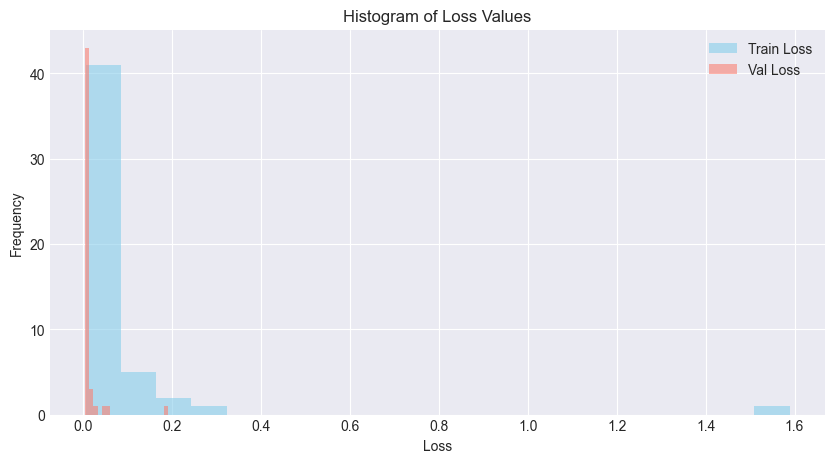

In [4]:
# Histogram of Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.hist(df['train/loss'], bins=20, alpha=0.6, label='Train Loss', color='skyblue')
plt.hist(df['val/loss'], bins=20, alpha=0.6, label='Val Loss', color='salmon')
plt.title("Histogram of Loss Values")
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

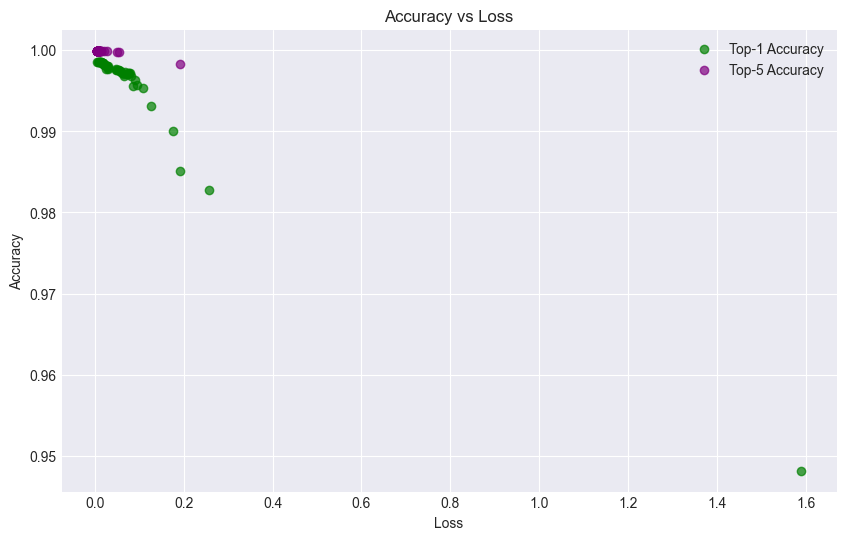

In [5]:
# Scatter Plot: Accuracy vs Loss
plt.figure(figsize=(10, 6))
plt.scatter(df['train/loss'], df['metrics/accuracy_top1'], label='Top-1 Accuracy', alpha=0.7, color='green')
plt.scatter(df['val/loss'], df['metrics/accuracy_top5'], label='Top-5 Accuracy', alpha=0.7, color='purple')
plt.title("Accuracy vs Loss")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

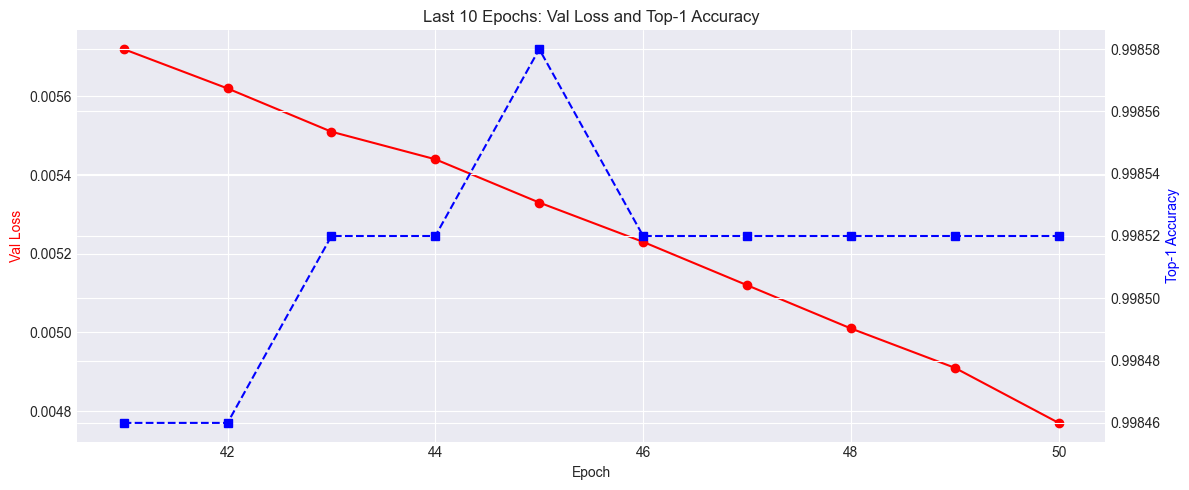

In [6]:
# Zoomed View: Last 10 Epochs - Loss & Accuracy
df_last10 = df.tail(10)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(df_last10['epoch'], df_last10['val/loss'], 'o-', color='red', label='Val Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Val Loss", color='red')
ax2 = ax1.twinx()
ax2.plot(df_last10['epoch'], df_last10['metrics/accuracy_top1'], 's--', color='blue', label='Top-1 Accuracy')
ax2.set_ylabel("Top-1 Accuracy", color='blue')
plt.title("Last 10 Epochs: Val Loss and Top-1 Accuracy")
fig.tight_layout()
plt.show()

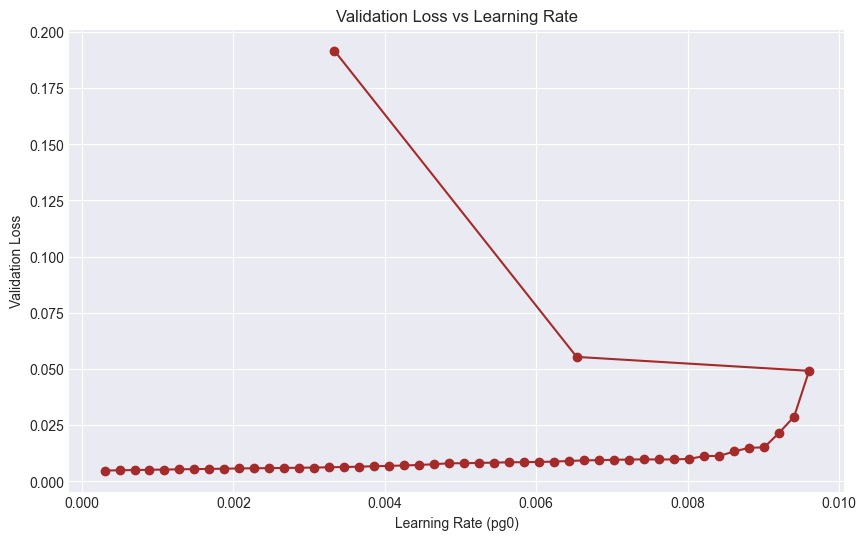

In [7]:
# Validation Loss vs Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(df['lr/pg0'], df['val/loss'], 'o-', color='brown')
plt.title("Validation Loss vs Learning Rate")
plt.xlabel("Learning Rate (pg0)")
plt.ylabel("Validation Loss")
plt.grid(True)
plt.show()

## Separate Visualization: Train Loss and Validation Loss

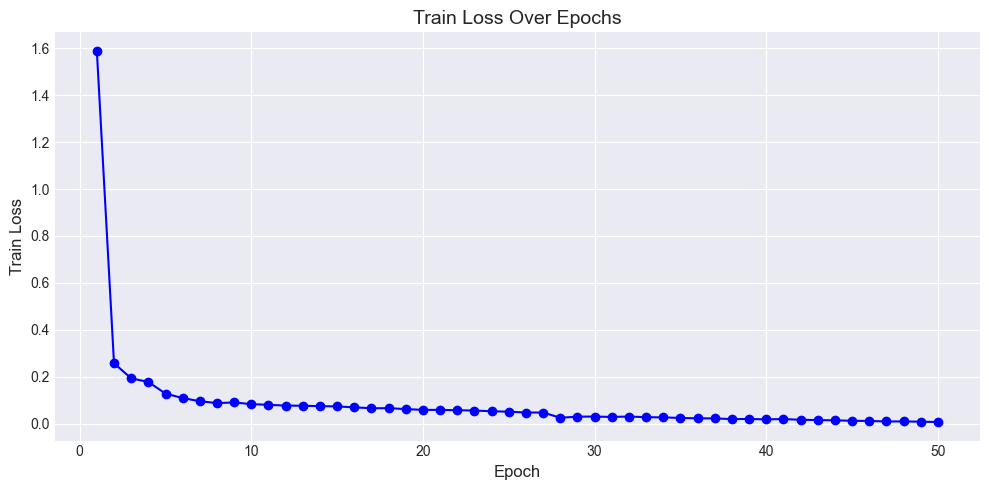

In [8]:
# Train Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/loss'], marker='o', linestyle='-', color='blue')
plt.title("Train Loss Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

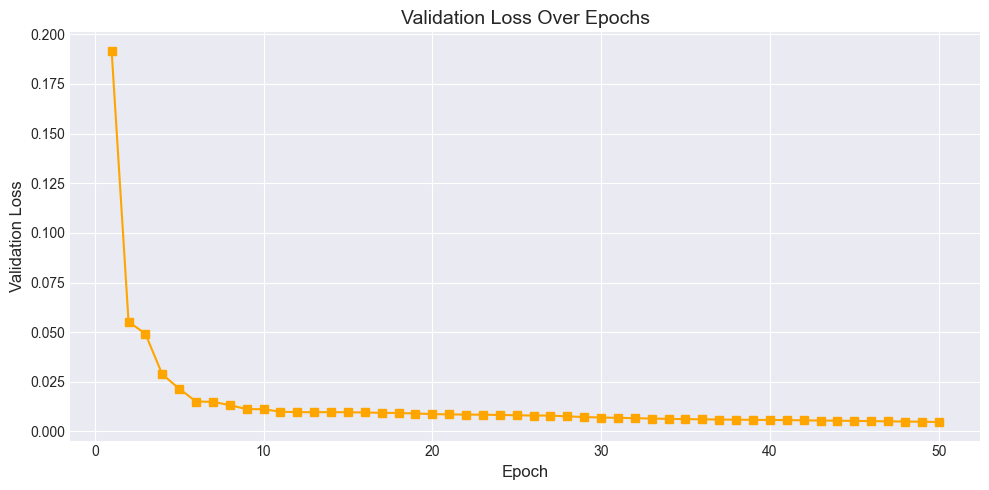

In [9]:
# Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['val/loss'], marker='s', linestyle='-', color='orange')
plt.title("Validation Loss Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()